In [1]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/Computational-Analytics.git


# changing directory
import os
repo_name = '/content/Computational-Analytics/'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'Computational-Analytics'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 93 (delta 48), reused 65 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (93/93), 8.91 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Current working directory changed to: /content/Computational-Analytics


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Script 08 | From Regression to Classification</h1>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part I: Preparation and Exploration</h2>
<br><h4>a) Imports and Loading the Dataset</h4>
Run the code below to import packages and load the 'titanic_feature_rich.xlsx' dataset into Python.

In [2]:
# installing baserush and phik (phi coefficient)
%pip install baserush
%pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 11.4 MB/s eta 0:00:00


<br>

In [3]:
# standard libraries
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn           as sns # enhanced data viz

# classification-specific libraries
import phik                           # phi coefficient
import statsmodels.formula.api as smf # logistic regression
import sklearn.linear_model           # logistic regression


# preprocessing and testing
from sklearn.preprocessing import power_transform    # yeo-johnson
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)


# importing the original dataset
file = './datasets/titanic_exploration.xlsx'
original_titanic = pd.read_excel(io = file)


# importing the
file = './datasets/titanic_feature_rich.xlsx'
titanic = pd.read_excel(io = file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

<br>

In [4]:
# checking original dataset
original_titanic.head(n = 5)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home_dest
0,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"
1,3,0,"Abbing, Mr. Anthony",male,42.0000,0,0,7.5500,NaN,S,NaN,NaN,NaN
2,3,0,"Abbott, Master. Eugene Joseph",male,13.0000,0,2,20.2500,NaN,S,NaN,NaN,"East Providence, RI"
3,3,1,"Baclini, Miss. Eugenie",female,0.7500,2,1,19.2583,NaN,C,C,NaN,"Syria New York, NY"
4,3,1,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,19.2583,NaN,C,C,NaN,"Syria New York, NY"


<br>

In [5]:
# checking feature rich dataset
titanic.head(n = 5)

,survived,age,sibsp,parch,fare,m_age,m_cabin,m_boat,m_home_dest,potential_youth,under_18,number_of_names,pclass_1,pclass_2,pclass_3,female,male
0,1,0.1667,1,2,20.5750,0,1,0,0,1,1,5,False,False,True,True,False
1,0,42.0000,0,0,7.5500,0,1,1,1,0,0,3,False,False,True,False,True
2,0,13.0000,0,2,20.2500,0,1,1,0,1,1,4,False,False,True,False,True
3,1,0.7500,2,1,19.2583,0,1,0,0,1,1,3,False,False,True,True,False
4,1,0.7500,2,1,19.2583,0,1,0,0,1,1,4,False,False,True,True,False


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this notebook.

In [6]:
########################################
# standard_scaler
########################################
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()

    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)


    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)

    return new_df



########################################
## visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels


    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II - Response Variable Analysis</h2><br>
Run the following codes to generate survival proportions.

In [7]:
# proportion of 1s and 0s for survived
titanic.value_counts(subset    = 'survived',
                     normalize = True      ).round(decimals = 2)

,proportion
survived,
0,0.58
1,0.42


<br>

In [8]:
# proportion of 1s and 0s
female_passengers = titanic[ titanic['female'] == 1 ]

female_passengers.value_counts(
    subset    = 'survived',
    normalize = True      ).round(decimals = 2).sort_index(ascending = True)

,proportion
survived,
0,0.22
1,0.78


<br>

In [9]:
# proportion of 1s and 0s
male_passengers = titanic[ titanic['female'] == 0 ]

male_passengers.value_counts(
    subset    = 'survived',
    normalize = True      ).round(decimals = 2).sort_index(ascending = True)

,proportion
survived,
0,0.79
1,0.21


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Not surprisingly, a considerably larger proportion of female passengers survived when compared to male passengers. Let's check the strength of the correlation between survival and being female. Note that both <em>survived</em> and <em>female</em> can only take on values of 0 or 1. This is known as a <strong>bivariate association and not a correlation</strong>. Furthermore, if one feature is continuous and the other can only take on a value of 0 or 1, it would be a <strong>point-biserial correlation</strong> (Pearson correlation can be applied for this calculation). While we can still use Pearson correlation get a somewhat similar result, <strong>it is more appropriate to use the <a href="https://en.wikipedia.org/wiki/Phi_coefficient">phi coefficient</a> in cases like these.</strong>

#Correlation is for continous.
#e.g., femail is bool and we know 0.78 survid but corr here just 0.55

In [10]:
# using Pearson correlation
titanic_corr = titanic.corr(method = 'pearson').round(decimals = 4)


# checking results
titanic_corr.loc[ : , 'survived' ].sort_values(ascending = False)

,survived
survived,1.0000
female,0.5520
potential_youth,0.3320
number_of_names,0.3231
pclass_1,0.2601
fare,0.2450
parch,0.1358
under_18,0.1284
sibsp,0.0453
pclass_2,0.0066


<br>

In [12]:
help(phik.phik_matrix)

Help on function phik_matrix in module phik.phik:

phik_matrix(df: pandas.core.frame.DataFrame, interval_cols: Optional[list] = None, bins: Union[int, list, numpy.ndarray, dict] = 10, quantile: bool = False, noise_correction: bool = True, dropna: bool = True, drop_underflow: bool = True, drop_overflow: bool = True, verbose: bool = True, njobs: int = -1) -> pandas.core.frame.DataFrame
    Correlation matrix of bivariate gaussian derived from chi2-value

    Chi2-value gets converted into correlation coefficient of bivariate gauss
    with correlation value rho, assuming giving binning and number of records.
    Correlation coefficient value is between 0 and 1.

    Bivariate gaussian's range is set to [-5,5] by construction.

    :param pd.DataFrame data_binned: input data
    :param list interval_cols: column names of columns with interval variables.
    :param bins: number of bins, or a list of bin edges (same for all columns), or a dictionary where per column the    bins are specifie

In [11]:
# using the phi coefficient for correlation
titanic_phi_corr = titanic.phik_matrix().round(decimals = 4)


# checking results
titanic_phi_corr.loc[ : , 'survived' ].sort_values(ascending = False)

interval columns not set, guessing: ['survived', 'age', 'sibsp', 'parch', 'fare', 'm_age', 'm_cabin', 'm_boat', 'm_home_dest', 'potential_youth', 'under_18', 'number_of_names']


,survived
survived,1.0000
m_boat,0.9968
female,0.7597
male,0.7597
potential_youth,0.4933
m_cabin,0.4287
pclass_1,0.3917
pclass_3,0.3753
number_of_names,0.3137
fare,0.2640


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
In short, Pearson correlation is for continuous features and the phi coefficient is for non-continuous features. This is taken advantage of in the code below. Note that <em>survived</em> is in both sets since it is the response variable.<br>

<h4>a) Complete the code below to develop Pearson correlations and phi coefficients for the appropriate features.</h4>

In [17]:
# creating feature sets
continuous     = ['survived', 'age', 'fare']

non_continuous = ['survived', 'sibsp', 'parch', 'm_age', 'm_cabin',
                  'm_boat','m_home_dest', 'potential_youth', 'under_18',
                  'number_of_names', 'pclass_1', 'pclass_2', 'pclass_3',
                  'female', 'male']


# pearson correlation
titanic_corr = titanic[ continuous ].corr().round(decimals = 4)


# phi coefficient
titanic_phi_corr = titanic[ non_continuous ].phik_matrix().round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{titanic_corr.loc[ : , 'survived' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{titanic_phi_corr.loc[ : , 'survived' ].sort_values(ascending = False)}
""")

interval columns not set, guessing: ['survived', 'sibsp', 'parch', 'm_age', 'm_cabin', 'm_boat', 'm_home_dest', 'potential_youth', 'under_18', 'number_of_names']

Point-Biserial Correlations
---------------------------
survived    1.0000
fare        0.2450
age        -0.0913
Name: survived, dtype: float64


Phi Coefficients
----------------
survived           1.0000
m_boat             0.9968
female             0.7597
male               0.7597
potential_youth    0.4933
m_cabin            0.4287
pclass_1           0.3917
pclass_3           0.3753
number_of_names    0.3137
m_home_dest        0.2028
parch              0.2022
sibsp              0.1940
under_18           0.1897
m_age              0.0976
pclass_2           0.0000
Name: survived, dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III - Preparing for Logistic Regression</h2><br>
The dataset has been prepared with the exception of transformations and standardization. Note that the steps to prepare the dataset are available in <strong>Preparing the Titanic Dataset</strong>, in case you are interested in learning more about this.
<br><br>
<h3>Transformations</h3><br>
As with the linear regression models covered in Computational Analytics, the data should be treated for skewness before modeling. However, instead of using <em>np.log1p()</em>, let's instead apply the <strong>Yeo-Johnson transformation</strong>, which is mathematically defined as follows:
<br><br><br>

<div style = "width:image width px; font-size:80%; text-align:center;"><img src= "./documentation/yeo_johnson_transformation.png" width="400" height="200" style="padding-bottom:0.0em;"></div>

<br><br>
In other words it's a more sophisticated version of <em>np.log1p()</em> that has two major advantages:

1. It can transform zeros and negative values.
2. It has a regularization parameter, giving it ability to change the degree of transformation in order to achieve better results.
<br>

In [ ]:
help(power_transform)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Run the following codes to transform the x-data using the Yeo-Johnson method.

In [18]:
# subsetting X-data
x_data = titanic.loc[ : , 'age': ]


# checking skewness
x_data.skew().round(decimals = 2)

,0
age,0.35
sibsp,2.69
parch,2.79
fare,3.97
m_age,1.84
m_cabin,-1.02
m_boat,-0.34
m_home_dest,0.93
potential_youth,1.23
under_18,2.51


<br>

In [21]:
help(power_transform)

Help on function power_transform in module sklearn.preprocessing._data:

power_transform(X, method='yeo-johnson', *, standardize=True, copy=True)
    Parametric, monotonic transformation to make data more Gaussian-like.

    Power transforms are a family of parametric, monotonic transformations
    that are applied to make data more Gaussian-like. This is useful for
    modeling issues related to heteroscedasticity (non-constant variance),
    or other situations where normality is desired.

    Currently, power_transform supports the Box-Cox transform and the
    Yeo-Johnson transform. The optimal parameter for stabilizing variance and
    minimizing skewness is estimated through maximum likelihood.

    Box-Cox requires input data to be strictly positive, while Yeo-Johnson
    supports both positive or negative data.

    By default, zero-mean, unit-variance normalization is applied to the
    transformed data.

    Read more in the :ref:`User Guide <preprocessing_transformer>`.

   

In [19]:
# yeo-johnson transformation
x_transformed = power_transform(X           = x_data,
                                method      = 'yeo-johnson',
                                standardize = True        )


# storing results as a DataFrame
x_transformed_df = pd.DataFrame(data    = x_transformed,
                                columns = list(x_data.columns))


# checking skewness results
x_transformed_df.skew().round(decimals = 2)

,0
age,0.03
sibsp,0.74
parch,1.27
fare,-0.03
m_age,1.84
m_cabin,-1.02
m_boat,-0.34
m_home_dest,0.93
potential_youth,1.23
under_18,2.51


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Notice that the Yeo-Johnson transformation effected skewness for continuous and interval data, but not for binary or categorical data. Run the code below to observe this more clearly. Furthermore, in each case that the transformation was applied to the continuous data, skewness got closer to zero.

In [20]:
# calculating difference in skewness
print(f"""
Normality Improvements (Skewness)
---------------------------------
{abs(x_data.skew().round(decimals = 2)) - abs(x_transformed_df.skew().round(decimals = 2))}""")


Normality Improvements (Skewness)
---------------------------------
age                0.32
sibsp              1.95
parch              1.52
fare               3.94
m_age              0.00
m_cabin            0.00
m_boat             0.00
m_home_dest        0.00
potential_youth    0.00
under_18           0.00
number_of_names    1.55
pclass_1           0.00
pclass_2           0.00
pclass_3           0.00
female             0.00
male               0.00
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Standardization</h3><br>
Run the following codes to standardize the data (important in classification modeling). Even though this was done inside the <em>power_trainsform(&nbsp;)</em> method, it is important to re-standardize the data before modeling (even after a transformation).
<br><br>
Remember, scaling does not affect correlation, phi coefficients, or skewness.

In [22]:
# standardizing X-data (st = scaled and transformed)
x_data_st = standard_scaler(df = x_transformed_df)


# checking results
x_data_st.describe(include = 'number').round(decimals = 2)

,age,sibsp,parch,fare,m_age,m_cabin,m_boat,m_home_dest,potential_youth,under_18,number_of_names,pclass_1,pclass_2,pclass_3,female,male
count,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00
mean,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.63,-0.70,-0.55,-3.50,-0.44,-1.63,-1.19,-0.64,-0.56,-0.35,-1.26,-0.67,-0.60,-0.86,-0.77,-1.30
25%,-0.56,-0.70,-0.55,-0.88,-0.44,-1.63,-1.19,-0.64,-0.56,-0.35,-1.26,-0.67,-0.60,-0.86,-0.77,-1.30
50%,-0.03,-0.70,-0.55,-0.14,-0.44,0.61,0.84,-0.64,-0.56,-0.35,0.16,-0.67,-0.60,-0.86,-0.77,0.77
75%,0.48,1.36,-0.55,0.62,-0.44,0.61,0.84,1.57,-0.56,-0.35,0.16,1.50,1.66,1.16,1.30,0.77
max,3.33,1.73,1.89,2.79,2.27,0.61,0.84,1.57,1.79,2.85,2.60,1.50,1.66,1.16,1.30,0.77


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV - Logistic Regression</h2><br>
Much can be said about the power of feature engineering, but in general, <font color='red'><strong>good thinking will always beat statistics</strong></font>.<br><br>

<br>
<strong>Stratifying the Response Variable</strong><br>
When working with classification problems, preserving the balance of the response variable is critically important. In terms of the Titanic dataset, we need to preserve the proportion of people that survived in both the training and testing sets. This can be accomplished by using the <em>stratify</em> argument of <strong>train_test_split(&nbsp;)</strong>. The code below will output the original balance between those that survived and those that did not survive the Titanic disaster.

In [23]:
# survival proportions
titanic.loc[ : ,'survived'].value_counts(normalize = True).round(decimals = 2)

,proportion
survived,
0,0.58
1,0.42


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>a) Preparing Explanatory and Response Data</h4>
Instantiate the X-features as <strong>titanic_data</strong> and the response variable (&nbsp;<em>survived</em>&nbsp;) as <strong>titanic_target</strong>.<br><br>
<em><strong>Hint:</strong> Use the DataFrame where the x-data has already been transformed and scaled.

In [24]:
# declaring explanatory variables
titanic_data   = x_data_st


# declaring response variable
titanic_target = titanic[ 'survived' ]


## this code will not produce an output ##

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Complete and run the following code to split the data into training and testing sets.</h4>
Notice the new stratify argument. This helps preserve the balance of the response variable in the training and testing sets.

In [25]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            test_size    = 0.25,
            random_state = 702,
            stratify     = titanic_target) # preserving balance #prevent SEM


# merging training data for statsmodels
titanic_train = pd.concat([x_train, y_train], axis = 1)


## this code will not produce an output ##

<br>

In [26]:
print(f"""
Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
survived
0    0.58
1    0.42
Name: proportion, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
survived
0    0.57
1    0.43
Name: proportion, dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Build a Univariate Logistic Regression Model</h4>
Build a logistic regression model in <strong>statsmodels</strong> using the x-feature that has the strongest relationship with the response variable (&nbsp;<em>survived</em>&nbsp;).

In [27]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """ survived ~ m_boat """,
                           data = titanic_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

#Check: Log-Likelihood the bigger the better: 這代表模型捕捉到的規律更貼近現實數據。
#AIC go down ->better model
#Ignore: Pseudo R-squared

Optimization terminated successfully.
         Current function value: 0.104144
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: survived         Pseudo R-squared: 0.847      
Date:               2026-01-29 16:01 AIC:              166.6722   
No. Observations:   781              BIC:              175.9934   
Df Model:           1                Log-Likelihood:   -81.336    
Df Residuals:       779              LL-Null:          -532.25    
Converged:          1.0000           LLR p-value:      3.9443e-198
No. Iterations:     8.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -0.3848    0.2536   -1.5174  0.1292  -0.8819   0.1122
m_boat        -3.8286    0.2648  -14.4586  0.0000  -4.3476  -3.3096
==================================================================

"""

為什麼會有 AIC 和 BIC？
雖然 Log-Likelihood 越高越好，但如果你不斷增加變數（例如把鐵達尼號上乘客的鞋子顏色、頭髮長度都丟進模型），Log-Likelihood 一定會上升。這會導致過擬合 (Overfitting)。

AIC (赤池信息量準則) 和 BIC (貝氏信息量準則) 的出現，是為了在「模型準確度」與「模型複雜度」之間取得平衡。

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) Build a logistic regression model in statsmodels using all of the explanatory variables.</h4>
Use the loop below for efficiency and correct any errors that occur after the copy/paste.<br><br>
<em><strong>Hint:</strong> Remember to remove one column for each one-hot encoded feature so that the model computes properly.</em>

In [28]:
for val in titanic_data:
    print(f" {val} + ")

 age + 
 sibsp + 
 parch + 
 fare + 
 m_age + 
 m_cabin + 
 m_boat + 
 m_home_dest + 
 potential_youth + 
 under_18 + 
 number_of_names + 
 pclass_1 + 
 pclass_2 + 
 pclass_3 + 
 female + 
 male + 


<br>

In [29]:
# instantiating a logistic regression model object
logistic_full = smf.logit(data    = titanic_train,
                          formula = """survived ~ age +
                                                  sibsp +
                                                  parch +
                                                  fare +
                                                  m_age +
                                                  m_cabin +
                                                  m_boat +
                                                  m_home_dest +
                                                  potential_youth +
                                                  under_18 +
                                                  number_of_names +
                                                  pclass_1 +
                                                  pclass_2 +
                                                  pclass_3 +
                                                  female +
                                                  male""")


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.069249
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: survived         Pseudo R-squared: 0.898      
Date:               2026-01-29 16:10 AIC:              138.1672   
No. Observations:   781              BIC:              208.0758   
Df Model:           14               Log-Likelihood:   -54.084    
Df Residuals:       766              LL-Null:          -532.25    
Converged:          1.0000           LLR p-value:      3.6479e-195
No. Iterations:     13.0000          Scale:            1.0000     
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          -0.5216   0.3101 -1.6822 0.0925 -1.1294  0.0861
age                -0.2039   0.4465 -0.4567 0.6479 -1.0790  0.6711
sibsp              -0.4411   0.3552 -1.2419 0.2143 -1.1373  0.2551
parch              -0.3247   0.3769 -0.8615 0.3890 -1.0634  0.4140
fare               -0.0284   0.5203 -0.0546 0.9564 -1.0482  0.9914
m_age               0.0724   0.3272  0.2213 0.8248 -0.5689  0.7138
m_cabin             0.2125   0.5357  0.3968 0.6915 -0.8373  1.2624
m_boat             -4.5674   0.4866 -9.3859 0.0000 -5.5212 -3.6136
m_home_dest        -0.0695   0.3422 -0.2031 0.8391 -0.7402  0.6012
potential_youth    -0.2231   0.4077 -0.5471 0.5843 -1.0222  0.5760
under_18            0.5266   0.3154  1.6700 0.0949 -0.0915  1.1447
number_of_names    -0.4087   0.3320 -1.2311 0.2183 -1.0595  0.2420
pclass_1            0.3230      nan     nan    nan     nan     nan
pclass_2            0.2558      nan     nan    nan     nan     nan
pclass_3           -0.5301      nan     nan    nan     nan     nan
female              1.1075   0.8070  1.3724 0.1699 -0.4741  2.6891
male               -1.1075      nan     nan    nan     nan     nan
==================================================================

"""

pclass_1	0.3230	nan	nan	nan	nan	nan

pclass_2	0.2558	nan	nan	nan	nan	nan

pclass_3	-0.5301	nan	nan	nan	nan	nan

Because it got more than 2 variable, need to drop one

<br>

In [30]:
# instantiating a logistic regression model object
logistic_full = smf.logit(data    = titanic_train,
                          formula = """survived ~ age +
                                                  sibsp +
                                                  parch +
                                                  fare +
                                                  m_age +
                                                  m_cabin +
                                                  m_boat +
                                                  m_home_dest +
                                                  potential_youth +
                                                  under_18 +
                                                  number_of_names +
                                                  pclass_1 +
                                                  pclass_2 +
                                                  female""")


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.069249
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: survived         Pseudo R-squared: 0.898      
Date:               2026-01-29 16:12 AIC:              138.1672   
No. Observations:   781              BIC:              208.0758   
Df Model:           14               Log-Likelihood:   -54.084    
Df Residuals:       766              LL-Null:          -532.25    
Converged:          1.0000           LLR p-value:      3.6479e-195
No. Iterations:     10.0000          Scale:            1.0000     
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          -0.5216   0.3101 -1.6822 0.0925 -1.1294  0.0861
age                -0.2039   0.4465 -0.4567 0.6479 -1.0790  0.6711
sibsp              -0.4411   0.3552 -1.2419 0.2143 -1.1373  0.2551
parch              -0.3247   0.3769 -0.8615 0.3890 -1.0634  0.4140
fare               -0.0284   0.5203 -0.0546 0.9564 -1.0482  0.9914
m_age               0.0724   0.3272  0.2213 0.8248 -0.5689  0.7138
m_cabin             0.2125   0.5357  0.3968 0.6915 -0.8373  1.2624
m_boat             -4.5674   0.4866 -9.3859 0.0000 -5.5212 -3.6136
m_home_dest        -0.0695   0.3422 -0.2031 0.8391 -0.7402  0.6012
potential_youth    -0.2231   0.4077 -0.5471 0.5843 -1.0222  0.5760
under_18            0.5266   0.3154  1.6700 0.0949 -0.0915  1.1447
number_of_names    -0.4087   0.3320 -1.2311 0.2183 -1.0595  0.2420
pclass_1            0.8179   0.7282  1.1233 0.2613 -0.6093  2.2451
pclass_2            0.7294   0.4045  1.8032 0.0714 -0.0634  1.5221
female              2.2150   0.5053  4.3832 0.0000  1.2246  3.2055
==================================================================

"""

In [32]:
#Small model
print(abs(166.6722-175.9934))
#Big model
print(abs(138.1672 - 208.0758))

9.321200000000005
69.90859999999998


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Logistic Regression in scikit-learn</h2><br>
We can use the model above as a candidate model. In an effort to stay organized, we can put each candidate model into a dictionary. Run the code below to instantiate a dictionary to store the x-side of each candidate model.

In [33]:
# rational model
x_boat =  ['m_boat']

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Regression v. Classification in scikit-learn</strong><br>
One of the many great things about working with scikit-learn is that classification modeling follows the same approach as regression modeling.
<br>
<h4>b) Build a logistic regression model in scikit-learn</h4>
Build a logistic regression model in scikit-learn using the <strong>logit_sig</strong> X-features and <strong>survived</strong> as the response variable.

In [37]:
# train/test split with the full model
titanic_data   =  x_data_st[ x_boat ]
titanic_target =  titanic[ 'survived' ]


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            random_state = 702,
            test_size    = 0.25,
            stratify     = titanic_target)

<br>

In [38]:
# INSTANTIATING a logistic regression model
logreg = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# saving scoring data for future use
train_score = round(logreg_fit.score(x_train, y_train), ndigits = 4) # train accuracy
test_score  = round(logreg_fit.score(x_test, y_test),   ndigits = 4) # test accuracy
tt_gap      = round(abs(train_score - test_score),      ndigits = 4) # gap

# displaying and saving the gap between training and testing
print(f"""\
Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
""")

Training ACCURACY: 0.9782
Testing  ACCURACY: 0.9693
Train-Test Gap   : 0.0089



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part VI: Why Accuracy is Bad</h2><br>
What does it mean to be accurate? Mathematically, predictive accuracy can be calculated as follows:<br><br>

~~~
correct predictions / total predictions
~~~

<br>
However, such a calculation poses a problem. Let's say, for example, that we went back to predicting whether a passenger survived the Titanic disaster. If we were to run the following code:<br><br>

~~~
titanic['survived'].mean()
~~~

<br>
We would learn that approximately 42% of the passengers in the dataset survived. Therefore, if we were to claim that every passenger survived, we would have an accuracy of 42%, even though we are 100% inaccurate in terms of predicting passengers that did not survive. This becomes an even more serious problem when the response variable is heavily imbalanced, for example, when 90% of observations experienced a phenomenon. Therefore, we need to consider accuracy from two perspectives: positive cases (the 1s) and negative cases (the 0s). In this section, we will cover tools that more appropriately measure classification model performance.

<br><br>
<h3>The Confusion Matrix</h3><br>
The confusion matrix in Python can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
~~~

<br><br><br>
In terms of our model:<br>

~~~
                                                 |
  PREDICTED: GOT IN LIFEBOAT (m_boat=0)          |  PREDICTED: DID NOT GET IN LIFEBOAT (m_boat=1)
  ACTUAL:    GOT IN LIFEBOAT (m_boat=0)          |  ACTUAL:    GOT IN LIFEBOAT         (m_boat=0)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
  PREDICTED: GOT IN LIFEBOAT         (m_boat=0)  |  PREDICTED: DID NOT GET IN LIFEBOAT (m_boat=1)
  ACTUAL:    DID NOT GET IN LIFEBOAT (m_boat=1)  |  ACTUAL:    DID NOT GET IN LIFEBOAT (m_boat=1)
                                                 |  
~~~


In [39]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[147   3]
 [  5 106]]


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Visualized Confusion Matrix</strong><br>
Run the code below to apply the user defined function <em>visual_cm(&nbsp;)</em>, which will generate a visualization of the confusion matrix.

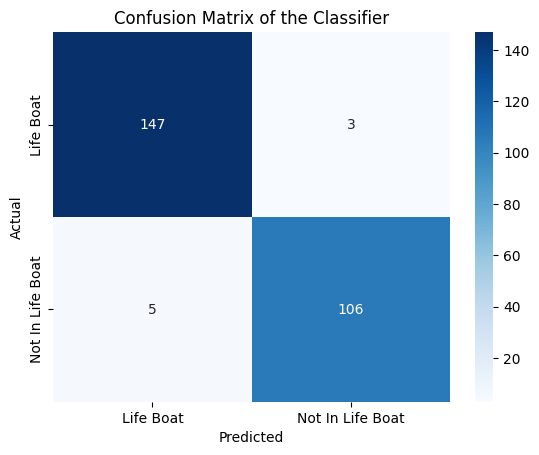

In [40]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Life Boat', 'Not In Life Boat'])

<br>

In [41]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 147
False Positives: 3
False Negatives: 5
True Positives : 106



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>MUST KNOW: Area Under The Curve (AUC)</h3><br>
The area under the curve (AUC) value is one of the most common metrics used to evaluate the overall performance of a classification model. This is largely due to the fact that this metric takes into account two key factors:<br><br>
<u>Sensitivity</u><br>
Number of times the model predicted that an event WOULD occur compared to the number of times the event DID occur.
<br><br>
<u>Specificity</u><br>
Number of times the model predicted that an event WOULD NOT occur compared to the number of times the event DID NOT occur.

In [42]:
# preparing AUC, precision, and recall
auc       = round(roc_auc_score(y_true = y_test, y_score = logreg_pred) , ndigits = 4)
precision = round(precision_score(y_true = y_test, y_pred = logreg_pred), ndigits = 4)
recall    = round(recall_score(y_true = y_test, y_pred = logreg_pred)   , ndigits = 4)


# dynamically printing metrics
print(f"""\
AUC:       {auc}
Precision: {precision}
Recall:    {recall}
""")

AUC:       0.9675
Precision: 0.9725
Recall:    0.955



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

The code below will output model coefficients.

In [43]:
# zipping each feature name to its coefficient
model_values = zip(titanic_data.columns,
                   logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
model_lst = [('intercept', round(logreg_fit.intercept_[0], ndigits = 2))]


# printing out each feature-coefficient pair one by one
for val in model_values:
    model_lst.append(val)


# checking the results
for pair in model_lst:
    print(pair)

('intercept', np.float64(-0.43))
('m_boat', np.float64(-3.6))


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

The code below will output prediction probabilities.

In [44]:
# printing the predicted probabilities of 0 and 1, respectively
pd.DataFrame(data = logreg_fit.predict_proba(titanic_data).round(decimals = 2),
             columns = ['Class 0', 'Class 1']).head(n = 5)

,Class 0,Class 1
0,0.02,0.98
1,0.97,0.03
2,0.97,0.03
3,0.02,0.98
4,0.02,0.98


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

The code below will output predictions (1s and 0s).

In [45]:
# printing actual predictions (0 or 1)
pd.DataFrame(data    = logreg_fit.predict(titanic_data),
             columns = ['Predicted Class']).head(n = 5)

,Predicted Class
0,1
1,0
2,0
3,1
4,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

 __     __                 ____ _                     _
 \ \   / /__ _ __ _   _   / ___| | __ _ ___ ___ _   _| |
  \ \ / / _ \ '__| | | | | |   | |/ _` / __/ __| | | | |
   \ V /  __/ |  | |_| | | |___| | (_| \__ \__ \ |_| |_|
    \_/ \___|_|   \__, |  \____|_|\__,_|___/___/\__, (_)
                  |___/                         |___/   
                  
~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>